# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import shap
import os
os.makedirs("images/", exist_ok=True)
import joblib
loaded_joblib = joblib.load("best_models.joblib")
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor', 'LinearRegression'])

In [2]:
# Model evaluation function
def evaluate_regression(model, X_train,y_train, X_test, y_test):
    """Evaluates a scikit learn regression model using r-squared and RMSE"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)

    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)

    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [3]:
# Saving the train/test split data into individual variables
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test  = loaded_joblib['X_test']
y_test  = loaded_joblib['y_test']
#  Saving the models & preprocessor from POPS-Revisited
rf_reg  = loaded_joblib['RandomForestRegressor']
lin_reg  = loaded_joblib['LinearRegression']

preprocessor = loaded_joblib['preprocessor']

In [4]:
# Evaluate loaded model
evaluate_regression(rf_reg, X_train, y_train, X_test, y_test)

Training Data:	R^2= 0.92	RMSE= 471.74
Test Data:	R^2= 0.45	RMSE= 1297.96


In [5]:
shap.initjs()

In [6]:
# Create X_shap variable
X_shap = shap.sample(X_train, nsamples = 400, random_state = 321)
X_shap

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
4469,7.720000,0.074669,76.3986,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4438,5.110000,0.034868,163.8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366,8.050000,0.078386,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2219,8.760000,0.050131,128.3336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6080,6.590000,0.176748,82.7908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,6.670000,0.150555,130.0626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4680,14.300000,0.034383,96.5726,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1288,16.000000,0.041029,142.6496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3635,12.822634,0.113213,254.6040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
# Create y_shap variable
y_shap = y_train.loc[X_shap.index].astype(int)
y_shap

4469    1402
4438    2120
366     5153
2219    2556
6080      83
        ... 
215      131
4680    2251
1288    1834
3635     759
7936    4074
Name: Item_Outlet_Sales, Length: 400, dtype: int32

In [8]:
# Reset index values
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,7.720000,0.074669,76.3986,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.110000,0.034868,163.8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8.050000,0.078386,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.760000,0.050131,128.3336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6.590000,0.176748,82.7908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,6.670000,0.150555,130.0626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
396,14.300000,0.034383,96.5726,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
397,16.000000,0.041029,142.6496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
398,12.822634,0.113213,254.6040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Create model explainer
explainer = shap.Explainer(rf_reg)
explainer

In [10]:
# Getting the shap values
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [11]:
# Confirm shap values are 2 dimension
shap_values.shape

(400, 22)

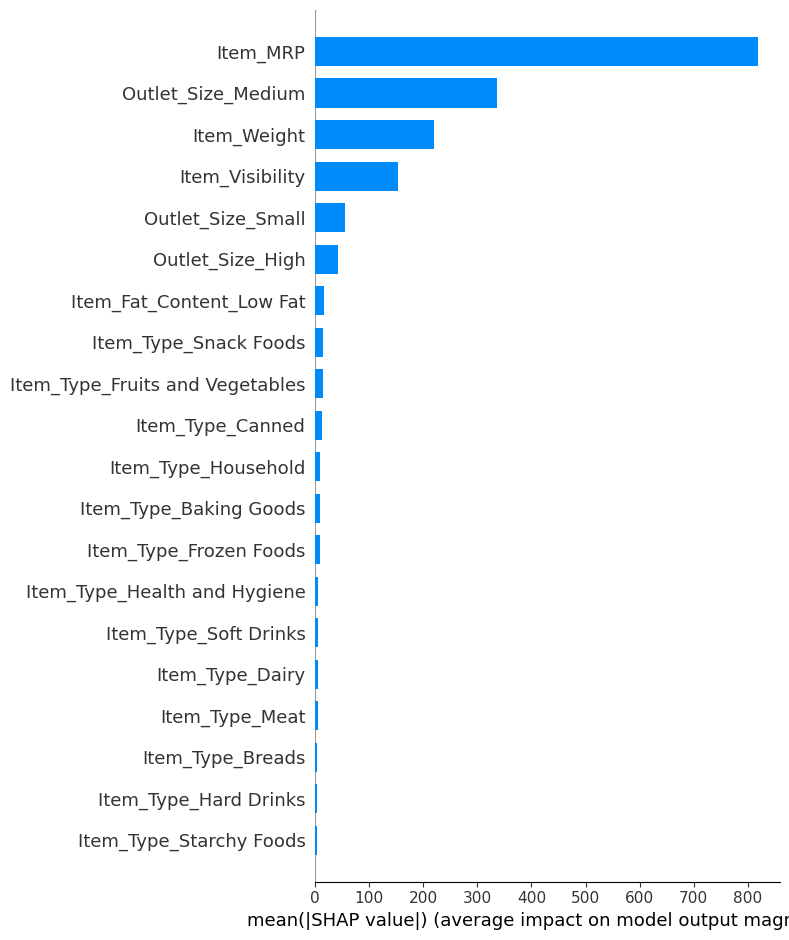

In [12]:
# Create a summary plot - with plot_type='bar'
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_1.png')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


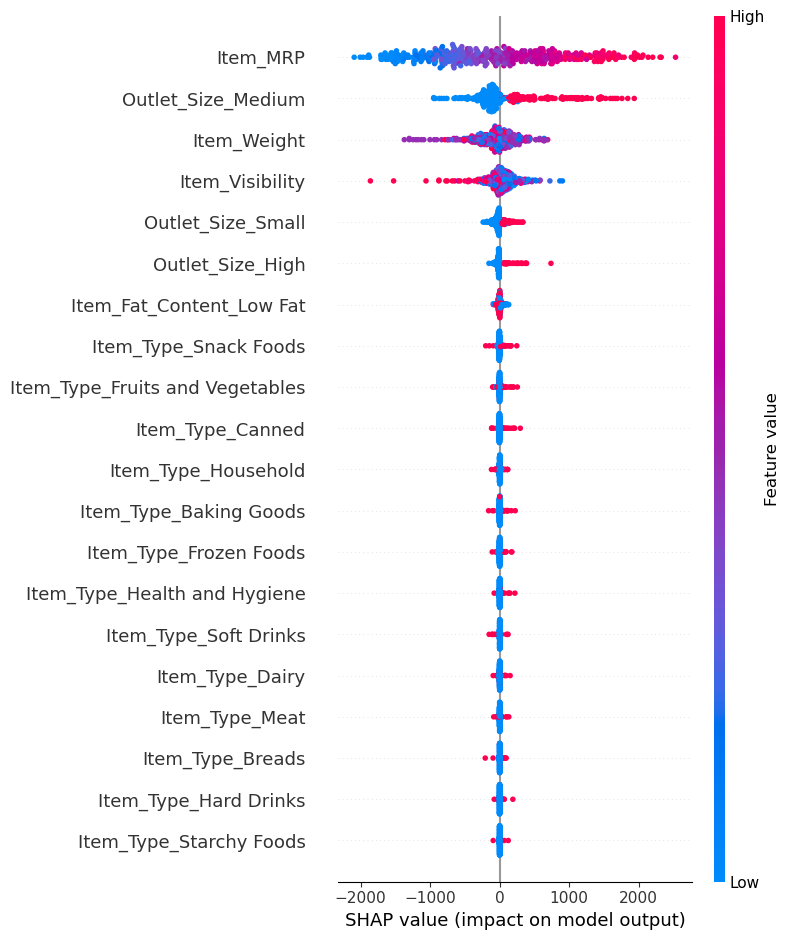

In [13]:
# Create a second summary plot - with plot_type='dot'
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap)
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_2.png')

# interpret the top 3 most important features and how they influence your model's predictions
##     item_mrp:
###     the dot plot display a greater concentration(red dots) to the right meaning that higher values of this will increase an item's sales

##     outlet_size_medium:
###     the higher positive concentration of medium size stores(red dots) will issue a positive impact to our prediction result
##     item_weight:
###     a central cluster of our values with mixed features(purple dots) is indicative of a(n) average/typical impact on the model predictions.
